## Lectura y gráfica de una Señal

### Importación de librerias

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

##### Abrir archivo txt

In [57]:
f = open("SenalEMG/Tomo6_victor_bicepsEMG.txt","r")
raw_data = f.readlines()[1] # con f.read() leemos todo el contenido
f.close()

raw_data

'# {"98:D3:B1:FD:3D:A9": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:B1:FD:3D:A9", "device connection": "BTH98:D3:B1:FD:3D:A9", "sampling rate": 100, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-9-8", "time": "10:14:41.589", "channels": [1], "sensor": ["EMGBITREV"], "label": ["A1"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n'

In [58]:
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['100', '128', '202', '589']


In [59]:
Fs = float(x[0])
Fs = Fs * 10
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leer archivo excluyendo 2 primeras filas

In [60]:
array = np.genfromtxt("SenalEMG/Tomo6_victor_bicepsEMG.txt", delimiter="\t",skip_header = 3)

## Visualización de la señal

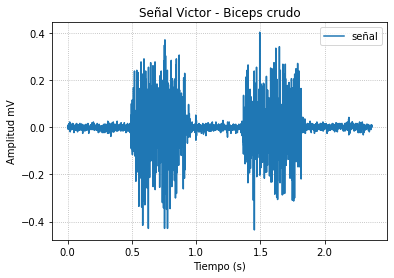

In [65]:
bits = 10
voltaje_ref = 3.3
y = (array[ :, 5]) * voltaje_ref /(2**bits - 1)
y = y - np.mean(y)
t = np.arange(0,len(y) * Ts, Ts)
plt.plot(t, y, label="señal")  
plt.title("Señal Victor - Biceps crudo")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud mV")
plt.legend(loc="upper right")
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('SenalVictor_Biceps.png', transparent=False, )
plt.show()

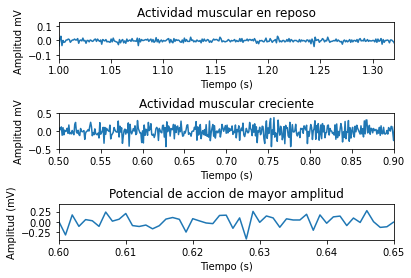

In [66]:
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.title("Actividad muscular en reposo")
plt.xlim(1, 1.32)
plt.ylim(-0.125, 0.125)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud mV")
plt.subplots_adjust(hspace=1.5)
#2
plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.title("Actividad muscular creciente")
plt.xlim(0.5, 0.9)
plt.ylim(-0.5, 0.5)


plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud mV")
#3
plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.title("Potencial de accion de mayor amplitud")
plt.xlim(0.6, 0.65)
plt.ylim(-0.45, 0.45)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('DiferenciasActividadMuscular.png', transparent=False, )


No handles with labels found to put in legend.


(0.0, 500.0)

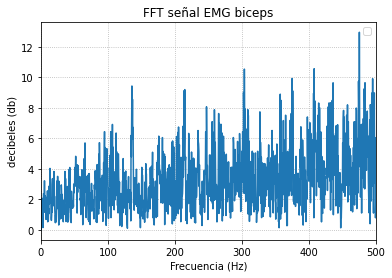

In [67]:
X = np.fft.fft(y)
X = np.abs(X)
N = len(y)
f = (Fs)*(np.arange(1,N+1)/N)
plt.figure()
plt.title("FFT señal EMG biceps")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.legend(loc="upper right")
fig.set_facecolor('white')
fig = plt.gcf()
plt.savefig('FFT_Senal.png.png', transparent=False, )
plt.plot(f,X)
plt.xlim((0, Fs/2))